In [1]:
!pip install gdown

import gdown

url = 'https://drive.google.com/uc?id=1GvCLm0jJXZielFL02B-s3ej4UkA3MWMY'
output = 'CapstoneData.zip'

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1GvCLm0jJXZielFL02B-s3ej4UkA3MWMY
From (redirected): https://drive.google.com/uc?id=1GvCLm0jJXZielFL02B-s3ej4UkA3MWMY&confirm=t&uuid=02b59aaa-72d0-4a17-b0de-170c5d7b77ef
To: /kaggle/working/CapstoneData.zip
100%|██████████| 575M/575M [00:03<00:00, 184MB/s] 


'CapstoneData.zip'

In [2]:
import zipfile

with zipfile.ZipFile('/kaggle/working/CapstoneData.zip', 'r') as zip_ref:
    zip_ref.extractall('Capstone Data') 


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split


dataset_path = '/kaggle/working/Capstone Data/Capstone Data'

train_folder = '/kaggle/working/train'
test_folder = '/kaggle/working/test'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    files = [file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))]

    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    for file in train_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(train_folder, class_folder, file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

    for file in test_files:
        src_path = os.path.join(class_path, file)
        dest_path = os.path.join(test_folder, class_folder, file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

print("Dataset split into train and test folders.")


Dataset split into train and test folders.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
train_path = train_folder
test_path = test_folder

In [5]:
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 589.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.0 which is incompatible.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from glob import glob

2024-04-09 14:35:42.162264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 14:35:42.162363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 14:35:42.395860: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 960/960 [00:05<00:00, 190.44it/s]


In [8]:
data.shape

(2160, 2)

In [9]:
from collections import Counter
Counter(y_data)

Counter({'Real': 1200, 'Fake': 960})

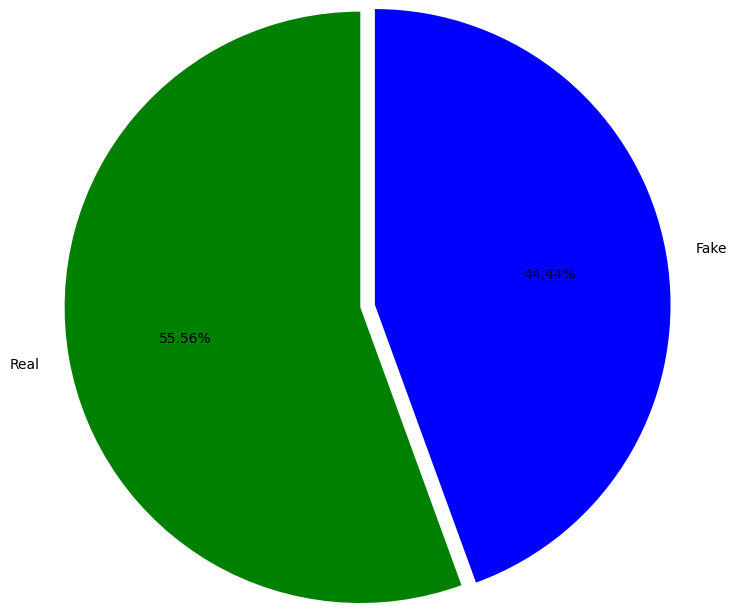

In [10]:
colors = ['green','blue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['Real', 'Fake'], colors= colors,radius=2)
plt.show()

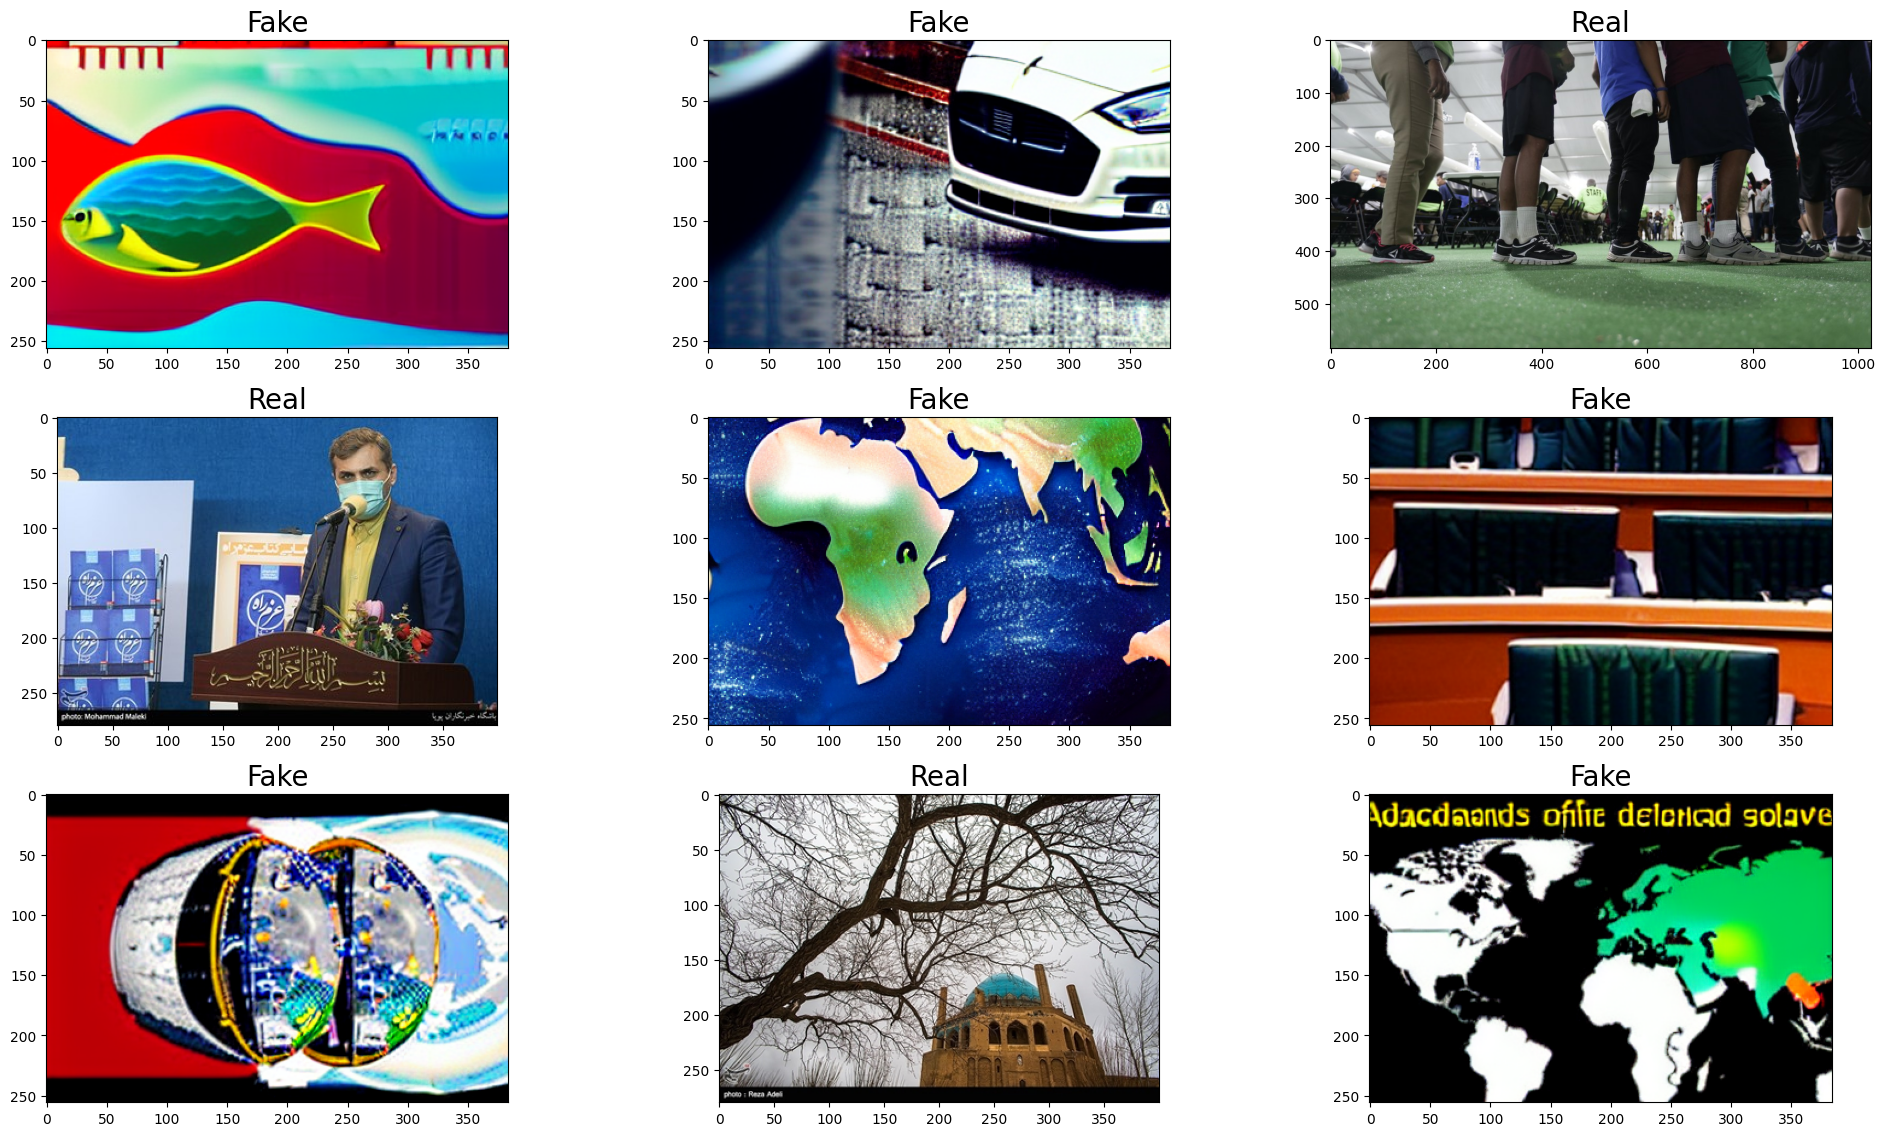

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(2000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [12]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

# Adding more convolutional layers
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

# Adding a dropout layer to improve generalization
model.add(Dropout(0.3))

model.add(Flatten())

# Adding more dense layers
model.add(Dense(512))
model.add(Activation("relu"))

# Adding another dropout layer
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation("relu"))

model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.3))

model.add(Dense(numberOfClass))  # Output
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

batch_size = 256


In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 2160 images belonging to 2 classes.
Found 541 images belonging to 2 classes.


In [16]:
hist = model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20


I0000 00:00:1712673445.261012     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712673445.282055     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/9 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5049 - loss: 0.6929   

W0000 00:00:1712673475.208806     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5087 - loss: 0.6927

W0000 00:00:1712673481.308325     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.5118 - loss: 0.6925 - val_accuracy: 0.5933 - val_loss: 0.6678
Epoch 2/20


W0000 00:00:1712673486.002636     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 923ms/step - accuracy: 0.6726 - loss: 0.6153 - val_accuracy: 0.8096 - val_loss: 0.4230
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - accuracy: 0.8128 - loss: 0.4567 - val_accuracy: 0.8521 - val_loss: 0.3821
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 802ms/step - accuracy: 0.8517 - loss: 0.3875 - val_accuracy: 0.8762 - val_loss: 0.3376
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 931ms/step - accuracy: 0.8695 - loss: 0.3473 - val_accuracy: 0.8558 - val_loss: 0.3272
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 927ms/step - accuracy: 0.8609 - loss: 0.3439 - val_accuracy: 0.8170 - val_loss: 0.3700
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 909ms/step - accuracy: 0.8615 - loss: 0.3551 - val_accuracy: 0.8909 - val_loss: 0.2738
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 912ms/step - accuracy: 0.8766 - loss: 0.3028 - val_accuracy: 0.8891 - val_loss: 0.2730
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 925ms/step - accuracy: 0.9021 - loss: 0.2548 - val_accuracy: 0.9279 - val_loss: 0.

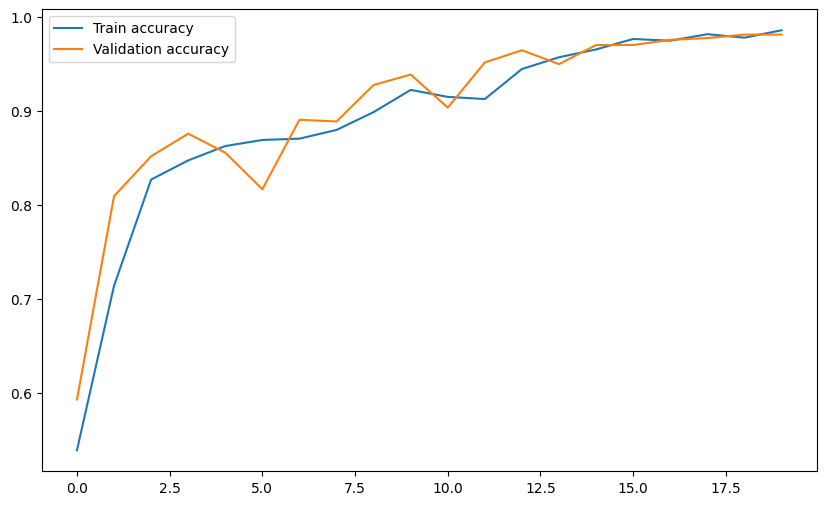

In [17]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

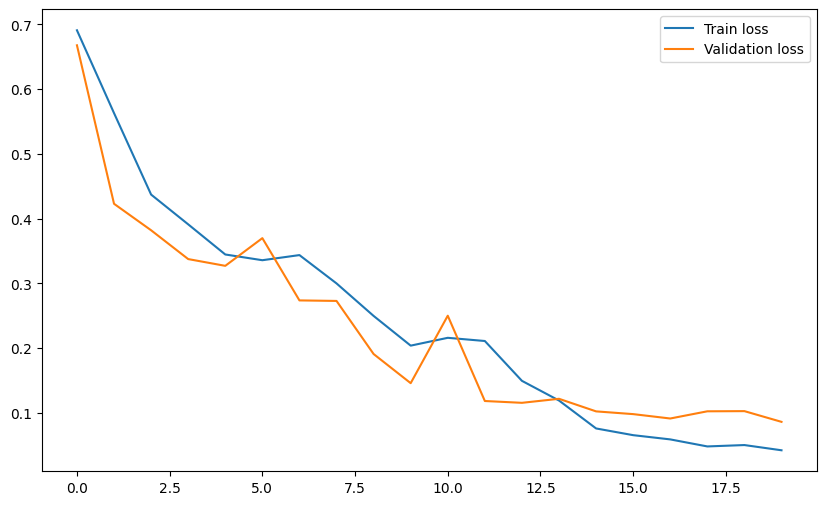

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Transfer Learning

### ResNet50

In [19]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)

model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_res = model_res.fit(train_generator, epochs=10, validation_data=test_generator)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
7/9 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - accuracy: 0.4915 - loss: 0.8331

W0000 00:00:1712673968.596840     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.5048 - loss: 0.8099 - val_accuracy: 0.7006 - val_loss: 0.6591
Epoch 2/10


W0000 00:00:1712673987.436580     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6165 - loss: 0.6673 - val_accuracy: 0.7523 - val_loss: 0.5824
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6819 - loss: 0.6046 - val_accuracy: 0.7967 - val_loss: 0.4762
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7719 - loss: 0.5139 - val_accuracy: 0.8226 - val_loss: 0.4285
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8064 - loss: 0.4601 - val_accuracy: 0.8373 - val_loss: 0.3890
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8137 - loss: 0.4167 - val_accuracy: 0.8355 - val_loss: 0.3850
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8267 - loss: 0.4103 - val_accuracy: 0.8503 - val_loss: 0.3692
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8294 - loss: 0.4079 - val_accuracy: 0.8447 - val_loss: 0.3588
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8340 - loss: 0.3908 - val_accuracy: 0.8503 - val_loss: 0.3526
Epoch 10/10
9/9 ━━━

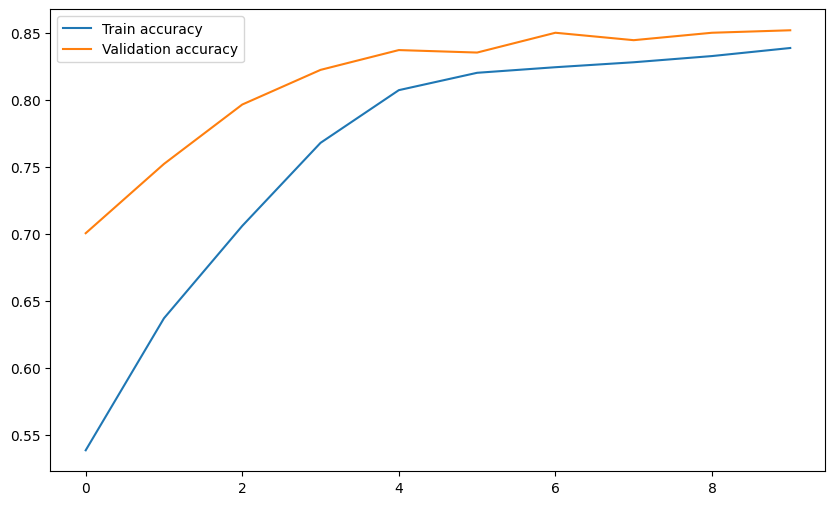

In [20]:
plt.figure(figsize=[10,6])
plt.plot(hist_res.history["accuracy"], label = "Train accuracy")
plt.plot(hist_res.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

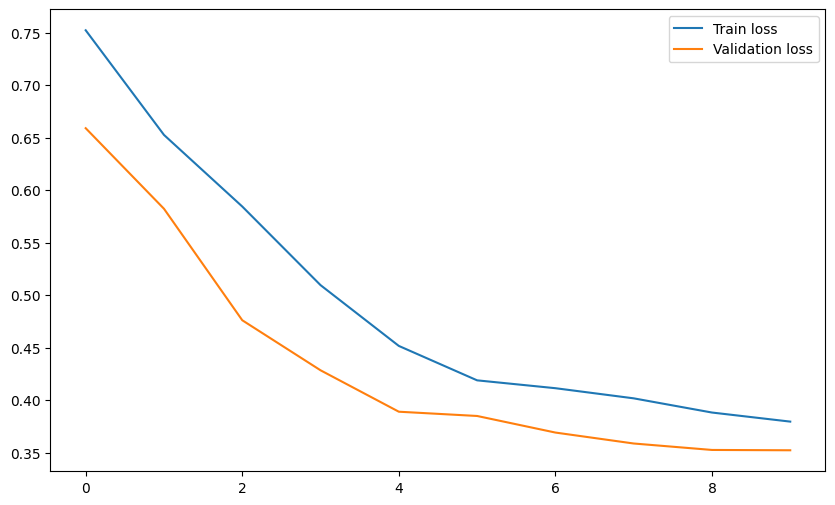

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist_res.history['loss'], label = "Train loss")
plt.plot(hist_res.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

### InceptionV3

In [22]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc = model_inc.fit(train_generator, epochs=10, validation_data=test_generator)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
2/9 ━━━━━━━━━━━━━━━━━━━━ 4:07 35s/step - accuracy: 0.5498 - loss: 0.8662 

W0000 00:00:1712674321.371878     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.5777 - loss: 0.8339 - val_accuracy: 0.8281 - val_loss: 0.5456
Epoch 2/10


W0000 00:00:1712674350.300857     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7137 - loss: 0.5855 - val_accuracy: 0.8392 - val_loss: 0.3539
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8215 - loss: 0.4320 - val_accuracy: 0.8577 - val_loss: 0.3316
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8461 - loss: 0.3696 - val_accuracy: 0.8688 - val_loss: 0.3068
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8728 - loss: 0.3126 - val_accuracy: 0.8835 - val_loss: 0.2839
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8894 - loss: 0.2649 - val_accuracy: 0.8872 - val_loss: 0.2755
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8965 - loss: 0.2496 - val_accuracy: 0.8817 - val_loss: 0.2633
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9123 - loss: 0.2202 - val_accuracy: 0.8854 - val_loss: 0.2571
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9259 - loss: 0.2001 - val_accuracy: 0.8965 - val_loss: 0.2645
Epoch 10/10
9/9 ━━━

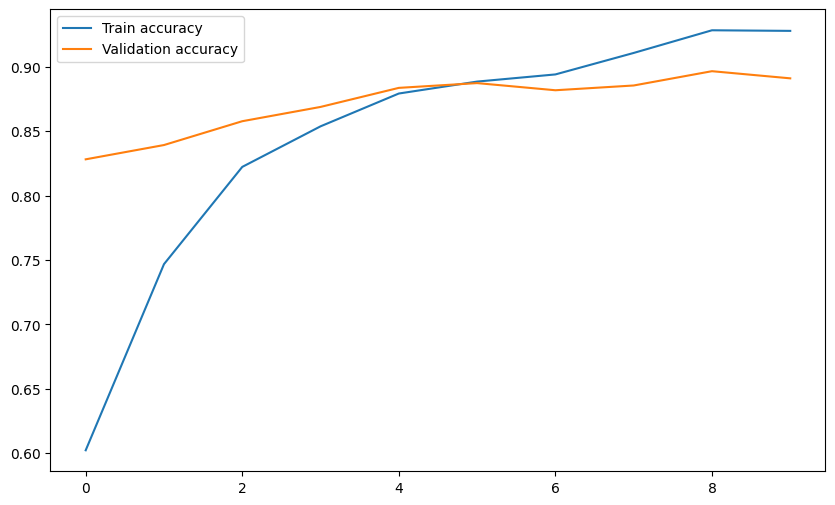

In [23]:
plt.figure(figsize=[10,6])
plt.plot(hist_inc.history["accuracy"], label = "Train accuracy")
plt.plot(hist_inc.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

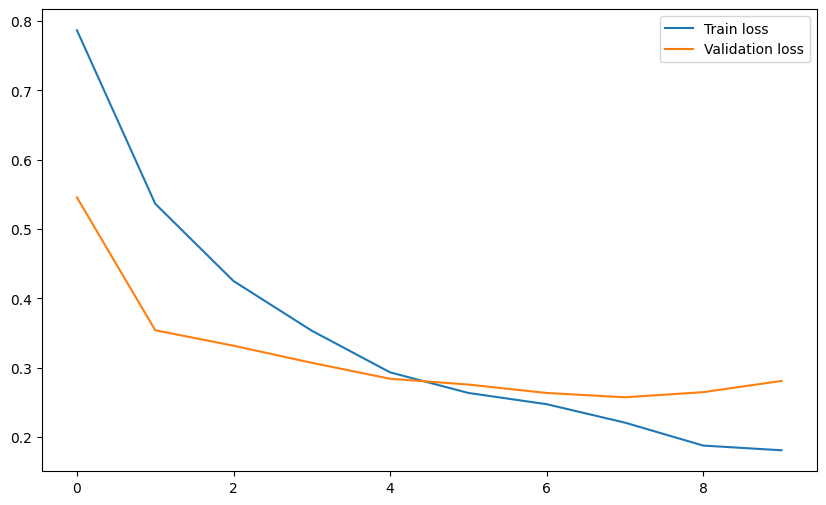

In [24]:
plt.figure(figsize=(10,6))
plt.plot(hist_inc.history['loss'], label = "Train loss")
plt.plot(hist_inc.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [25]:
model.save_weights('my_model_.weights.h5')

# Later, to load the weights
model.load_weights('my_model_.weights.h5')